# Time-Varying Exogenous Shocks

In [1]:
from utils.models import *

In [2]:
env()

--------- Dependencies ---------
python: 3.8.10 | packaged by conda-forge | (default, May 11 2021, 06:25:23) [MSC v.1916 64 bit (AMD64)]
numpy: 1.21.0
pandas: 1.2.4
matplotlib: 3.4.2
scipy: 1.7.1
statsmodels: 0.13.0
filterpy: 1.4.5


## VIX

In [3]:
wti = load('data/WTI.csv').pct_change().dropna()
c1 = clean_series('contract_1', wti)
vix = load('data/VIX.csv')
vix_shock = calc_shock('VIX', vix)

In [4]:
lags = 1
x0 = np.array([1 for _ in range(lags+1)])
kalman = KF(x0, lags=lags)
kf = kalman.run('contract_1', 'VIX', c1.join(vix_shock).dropna())

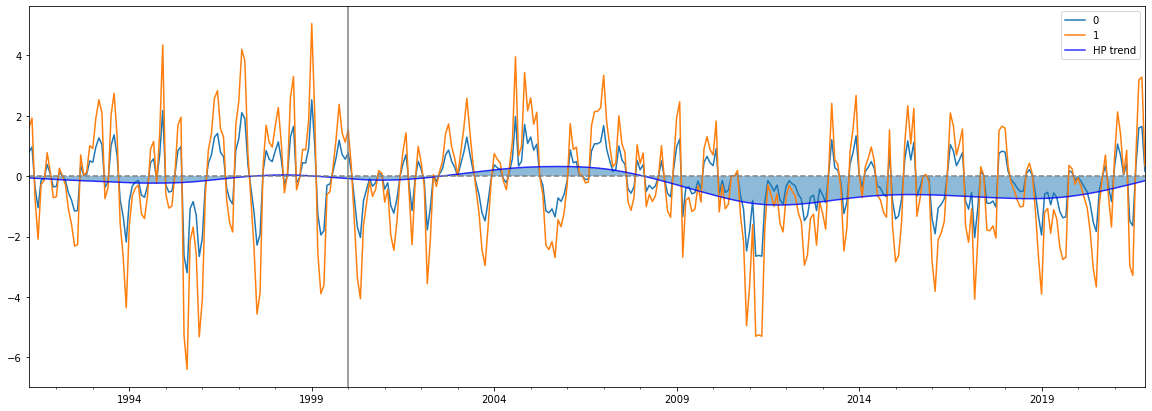

In [5]:
hp_kalman_plot(kf)

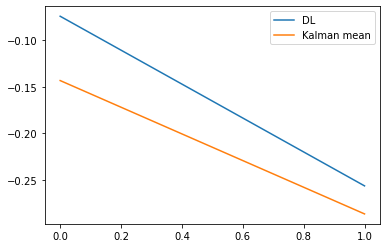

In [6]:
dl = DL('contract_1', 'VIX', c1.join(vix_shock).dropna().iloc[lags:], lags=lags, const=False)
plt.plot(np.cumsum(dl.model.params), label='DL')
plt.plot(kf.mean(), label='Kalman mean')
plt.legend()

RMSE Random Walk: 0.9935413458534287
RMSE OLS: 1.0181493573026517
RMSE Kalman: 0.7496109417103031


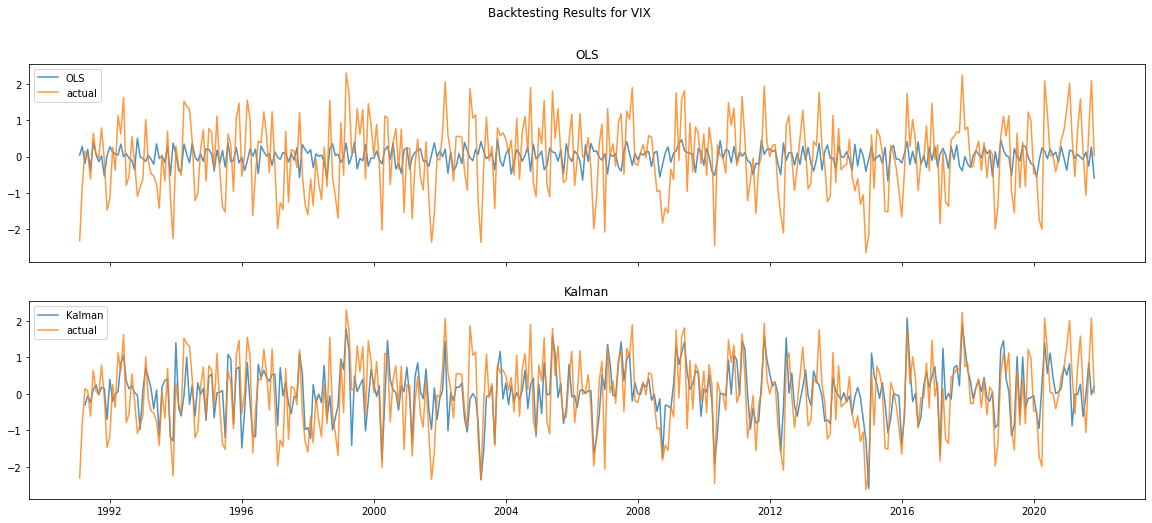

In [7]:
x = vix_shock['VIX']
plot_backtests(c1.contract_1, 'VIX', {'OLS': ols_backtest(x, dl.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(vix_shock.index))

## GPR

In [8]:
gpr = load('data/GPRGlobal.csv')
gpr_shock = calc_shock('GPRI', gpr)

In [9]:
kalman = KF(x0, lags=lags)
kf2 = kalman.run('contract_1', 'GPRI', c1.join(gpr_shock).dropna())

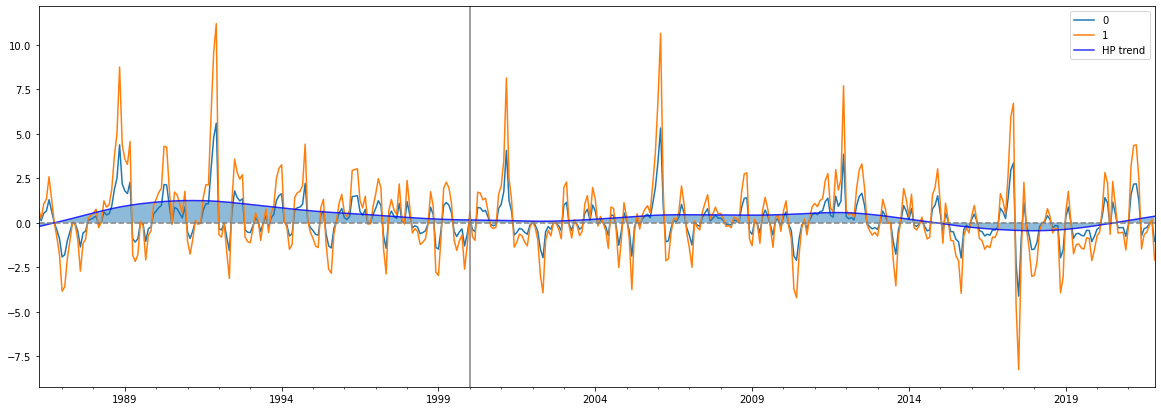

In [10]:
hp_kalman_plot(kf2)

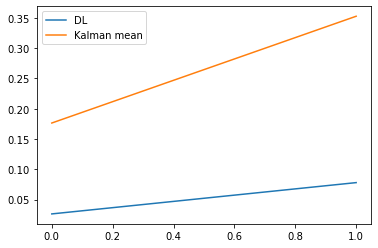

In [11]:
dl2 = DL('contract_1', 'GPRI', c1.join(gpr_shock).dropna().iloc[lags:], lags=lags)
plt.plot(np.cumsum(dl2.model.params), label='DL')
plt.plot(kf2.mean(), label='Kalman mean')
plt.legend()

RMSE Random Walk: 0.9935413458534287
RMSE OLS: 0.9937153011911508
RMSE Kalman: 0.7776327208655415


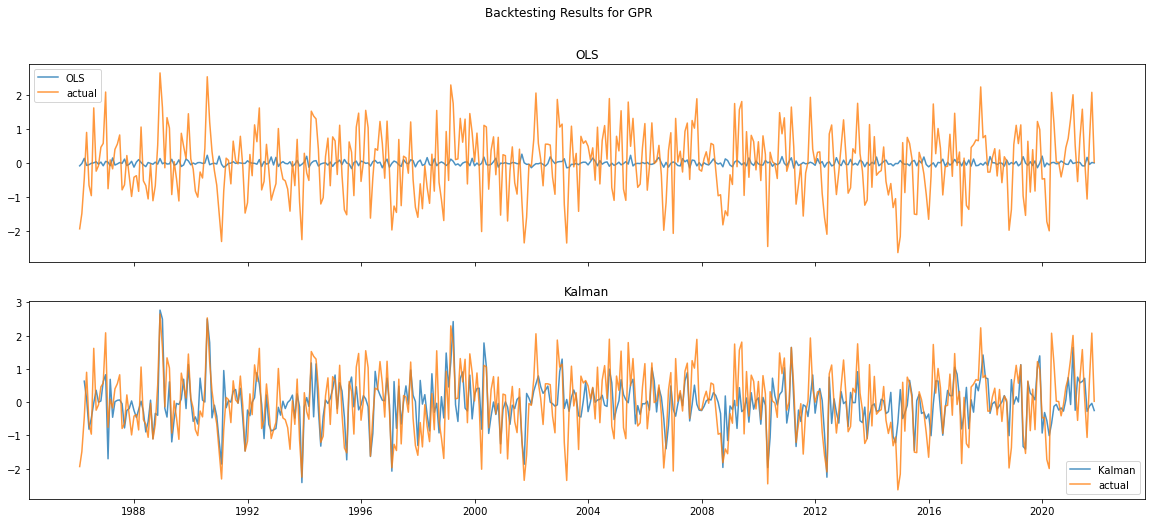

In [12]:
x = gpr_shock.GPRI
plot_backtests(c1.contract_1, 'GPR', {'OLS': ols_backtest(x, dl2.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(c1.index))

## EPU

In [13]:
epu = load('data/EPUGlobal.csv')
epu_shock = calc_shock('GEPU_current', epu)

In [14]:
kalman = KF(x0, lags=lags)
kf3 = kalman.run('contract_1', 'GEPU_current', c1.join(epu_shock).dropna())

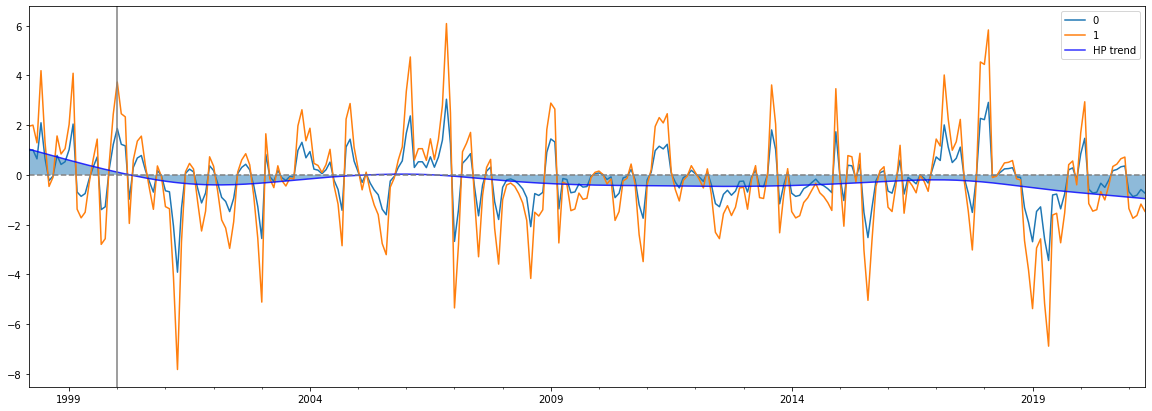

In [15]:
hp_kalman_plot(kf3)

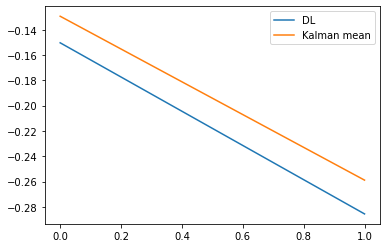

In [16]:
dl3 = DL('contract_1', 'GEPU_current', c1.join(epu_shock).dropna().iloc[lags:], lags=lags)
plt.plot(np.cumsum(dl3.model.params), label='DL')
plt.plot(kf3.mean(), label='Kalman mean')
plt.legend()

RMSE Random Walk: 0.9935413458534287
RMSE OLS: 1.0059928237137297
RMSE Kalman: 0.768789931052099


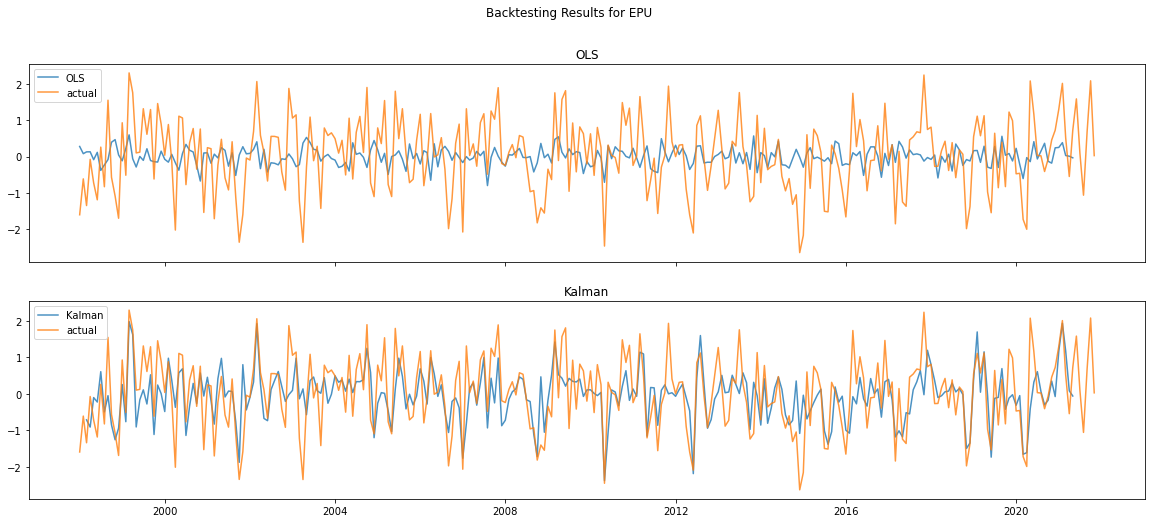

In [17]:
x = epu_shock.GEPU_current
plot_backtests(c1.contract_1, 'EPU', {'OLS': ols_backtest(x, dl3.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(epu_shock.index))

### Use only US EPU to extend sample further back

In [18]:
us_epu_shock = calc_shock('aggregate', load('data/EPU_US.csv'))

In [19]:
kalman = KF(x0, lags=lags)
kf4 = kalman.run('contract_1', 'aggregate', c1.join(us_epu_shock).dropna())

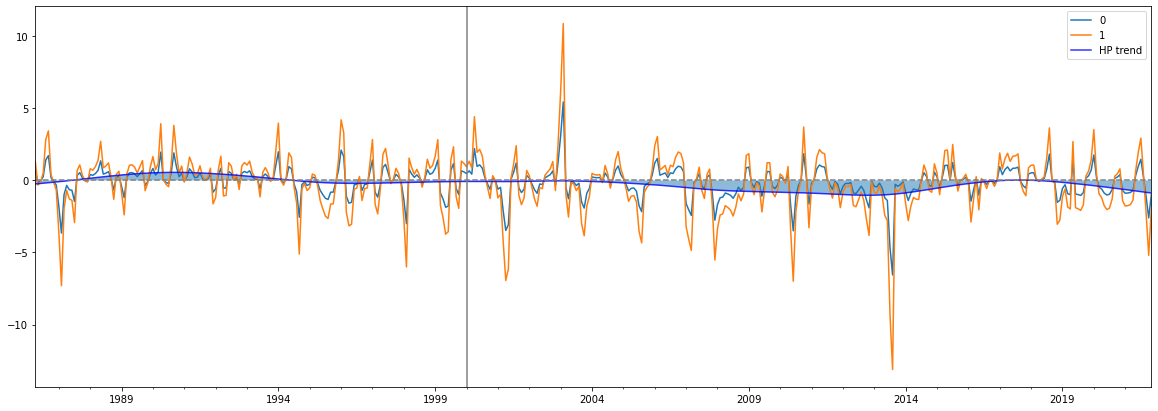

In [20]:
hp_kalman_plot(kf4)

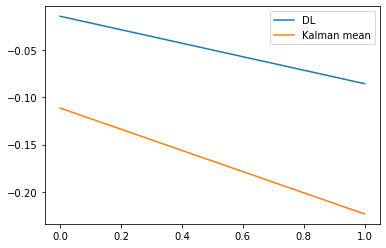

In [22]:
dl4 = DL('contract_1', 'aggregate', c1.join(us_epu_shock).dropna().iloc[lags:], lags=lags)
plt.plot(np.cumsum(dl4.model.params), label='DL')
plt.plot(kf4.mean(), label='Kalman mean')
plt.legend()

RMSE Random Walk: 0.9935413458534287
RMSE OLS: 0.9940557935912533
RMSE Kalman: 0.7751199947997115


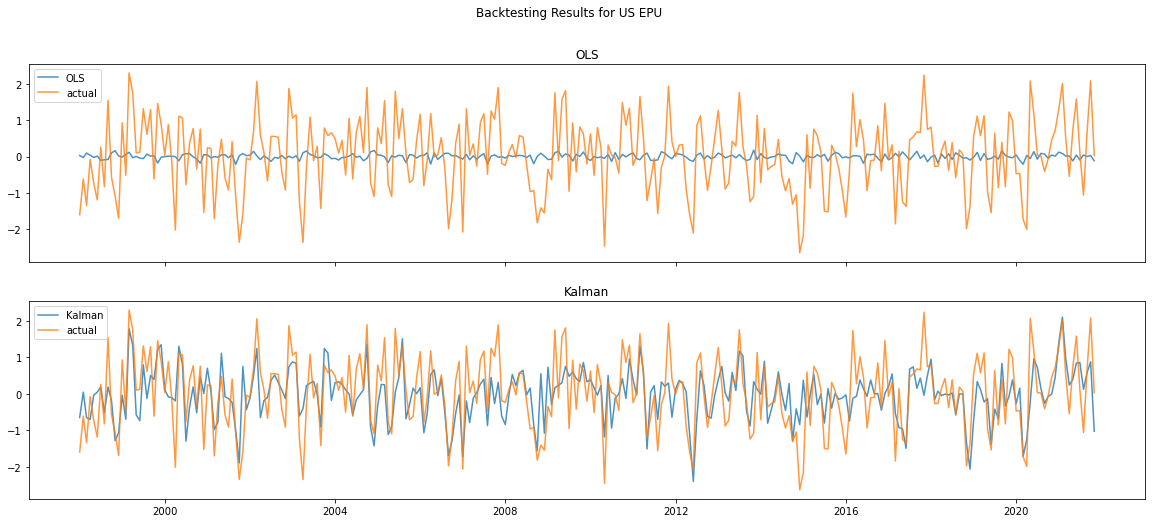

In [24]:
x = us_epu_shock['aggregate']
plot_backtests(c1.contract_1, 'US EPU', {'OLS': ols_backtest(x, dl4.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(epu_shock.index))